<p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold"><br>
Absenteeism time in hours</p><br>


<p style="font-family: Arial; font-size:3em;color:#2462C0; font-style:bold">
Introduction </p>
<br>

Every work place can't help but have workers who, depending on various reasons, decide to be absent. Why is that? Is there a more recurring reason across various subjects?

According to Forbes, Absenteeism is an employee’s intentional or habitual absence from work where excessive absences can equate to decreased productivity and can have a major effect on company finances, morale and other factors. There are different types of reasons that can lead to an absence at work such as Illness, Childcare, etc. 

This project will be looking at a dataset from Brazil where records of absenteeism at work were collected from July 2007 to July 2010 at a courier company. The goal is **to reduce worker absenteeism and evaluate the primary causes of absenteeism**.

A few questions to consider along the way:

* Which areas of life affect Abseenteeism(i.e: Work or Family..)?

* Is there an obvious relationship between reason for absence and absenteeism?

* Between regression models and Classification models, is there a better model for our problem?




# Data Exploration 

This dataset consists of **740 observations** and **21 features** with:
*  **8 Categorical features**: Reason for absence,Month of Absence, Day of the week, Seasons, Disciplinary failure,Education,Social drinker and Social smoker 

*  **13 numerical features**: ID, Transportation Expense , Distance from Residence to Work,Service time, Age , Work load , Hit target , Son, Pet, Weight, Height, Body mass index and Absenteeism time in hours 

In [65]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
%matplotlib inline

#First 10 rows
absent=pd.read_csv('./Absenteeism_at_work - Absenteeism_at_work.csv',sep=',')
print (type(absent))
absent.head(5)

<class 'pandas.core.frame.DataFrame'>


,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,"239,554",...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,"239,554",...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,"239,554",...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,"239,554",...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,"239,554",...,0,1,2,1,0,1,90,172,30,2


# Pre Processing

In order to build a good model, we need to have some understanding of the dataset using the Exploratory Data Analysis Process (EDA). For the first step, we will be looking at any necessary data cleaning.

In [66]:
#changing a float 64 to int64
absent['Work load Average/day ']=absent['Work load Average/day '].astype('str')
absent['Work load Average/day ']=absent['Work load Average/day '].str.replace(',', '')
absent['Work load Average/day ']=pd.to_numeric(absent['Work load Average/day '], errors='coerce')


In [67]:
absent.isnull().any()

ID                                 False
Reason for absence                 False
Month of absence                   False
Day of the week                    False
Seasons                            False
Transportation expense             False
Distance from Residence to Work    False
Service time                       False
Age                                False
Work load Average/day              False
Hit target                         False
Disciplinary failure               False
Education                          False
Son                                False
Social drinker                     False
Social smoker                      False
Pet                                False
Weight                             False
Height                             False
Body mass index                    False
Absenteeism time in hours          False
dtype: bool

In [68]:
absent.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271490.235135,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39058.116188,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294217.000000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


* The maximum value of Absenteeism time in hours  is 9 standard deviations away from the mean!
* The minimum values for Reason for absence and Month of absence are zero! These are considered unexpected values since 0 Month does not make sense.
* The ID column has 36 for the maximum value meaning that all these 740 observations are split amongst 36 workers. This means that all these rows are repeated observations over time among 36 people. 

A closer look of **the Absenteeism time in hours** and **Reason for absence** columns reveals that all 0's in both Absenteeism time in hours,Month of absence and Reason for absence columns correspond to Absenteeism time in hours=0.Doing so also takes out all the **Disciplinary failure==1** leaving us with only Disciplinary failure==0. This means that this feature is no longer needed for the analysis.

The rest of the analysis will be looking at the non zero values of Absenteeism with a new dataset called **allabsents**

In [69]:
allabsents=absent[absent['Absenteeism time in hours']!=0]
allabsents=allabsents.drop(['Disciplinary failure'],axis=1)
len(allabsents.ID.unique())

33

Since there are 33 ID's, I wanted to put together a dataframe where all of them

In [70]:
target=allabsents.groupby(['ID'])['Hit target'].mean()
work=allabsents.groupby(['ID'])['Work load Average/day '].mean()
age=allabsents.groupby(['ID'])['Age'].mean()
transport=allabsents.groupby(['ID'])['Transportation expense'].mean()
height=allabsents.groupby(['ID'])['Height'].mean()
service=allabsents.groupby(['ID'])['Service time'].mean()
weight=allabsents.groupby(['ID'])['Weight'].mean()
body=allabsents.groupby(['ID'])['Body mass index'].mean()
hours=allabsents.groupby(['ID'])['Absenteeism time in hours'].sum()
drink=allabsents.groupby(['ID'])['Social drinker'].mean()
smoker=allabsents.groupby(['ID'])['Social smoker'].mean()
education=allabsents.groupby(['ID'])['Education'].mean()
pet=allabsents.groupby(['ID'])['Pet'].mean()
smoker=allabsents.groupby(['ID'])['Social smoker'].mean()
distance=allabsents.groupby(['ID'])['Distance from Residence to Work'].mean()
zz=pd.concat([target,work,age,transport,service,height,body,weight,drink,smoker,education,pet,distance,hours],axis=1)

In [74]:
B=allabsents.ID.unique()
sor=sorted(B)
de=pd.get_dummies(allabsents['Reason for absence'],prefix='Reason')
hrs=allabsents[['ID','Absenteeism time in hours']]
x_f=pd.concat([de,hrs],axis=1)
#x_f.groupby(['Absenteeism time in hours'])['Reason_1'].sum()
bl=de.columns
ho=[]
for i in bl:
    for j in sor:
        r=x_f[x_f['ID']==j]
        so=sum(r[r[i]!=0][i])
        ho.append(so)
ne={'ID':sor,'Hrs':zz['Absenteeism time in hours'].values,'Hit target':zz['Hit target'].values,'Work':zz['Work load Average/day '].values,'Age':zz['Age'].values,
     'Transportation':zz['Transportation expense'].values,'Service time':zz['Service time'].values,'Height':zz['Height'].values,
     'BMI':zz['Body mass index'].values,'Weight':zz['Weight'].values,'Social drinker':zz['Social drinker'].values,
     'Social smoker':zz['Social smoker'].values,'Education':zz['Education'].values,'Pet':zz['Pet'].values,'Distance':zz['Distance from Residence to Work'].values
     ,'Reason_1':ho[0:33],'Reason_3':ho[33:66],
    'Reason_4':ho[66:99], 'Reason_5':ho[99:132], 'Reason_6':ho[132:165], 'Reason_7':ho[165:198],
       'Reason_8':ho[198:231], 'Reason_9':ho[231:264], 'Reason_10':ho[264:297], 'Reason_11':ho[297:330], 'Reason_12':ho[330:363],
       'Reason_13':ho[363:396], 'Reason_14':ho[396:429], 'Reason_15':ho[429:462], 'Reason_16':ho[462:495], 'Reason_17':ho[495:528],
       'Reason_18':ho[528:561], 'Reason_19':ho[561:594], 'Reason_21':ho[594:627], 'Reason_22':ho[627:660], 'Reason_23':ho[660:693],
       'Reason_24':ho[693:726], 'Reason_25':ho[726:759], 'Reason_26':ho[759:792], 'Reason_27':ho[792:825], 'Reason_28':ho[825:858]}

yoo=pd.DataFrame(data=ne)

month=pd.get_dummies(allabsents['Month of absence'],prefix='Month')
day=pd.get_dummies(allabsents['Day of the week'],prefix='day')
season=pd.get_dummies(allabsents['Seasons'],prefix='Season')
rest=pd.concat([month,day,season,hrs],axis=1)
unique_month=month.columns
mo=[]
rest1=rest.drop(['Absenteeism time in hours'],axis=1)
for i in unique_month:
    for j in sor:
        r=rest1[rest1['ID']==j]
        ki=sum(r[r[i]!=0][i])
        mo.append(ki)

mois={'Month_1':mo[0:33],'Month_2':mo[33:66],
    'Month_3':mo[66:99], 'Month_4':mo[99:132], 'Month_5':mo[132:165], 'Month_6':mo[165:198],
       'Month_7':mo[198:231], 'Month_8':mo[231:264], 'Month_9':mo[264:297], 'Month_10':mo[297:330], 'Month_11':mo[330:363],
       'Month_12':mo[363:396]} 
newmonth=pd.DataFrame(data=mois)

unique_season=season.columns
kj=[]
for i in unique_season:
    for j in sor:
        r=rest1[rest1['ID']==j]
        ku=sum(r[r[i]!=0][i])
        kj.append(ku)
sais={'Season_1':kj[0:33],'Season_2':kj[33:66],
    'Season_3':kj[66:99], 'Season_4':kj[99:132]} 
newseason=pd.DataFrame(data=sais)

unique_day=day.columns
hh=[]
for i in unique_day:
    for j in sor:
        r=rest1[rest1['ID']==j]
        oo=sum(r[r[i]!=0][i])
        hh.append(oo)
jour={'day_2':hh[0:33],'day_3':hh[33:66],
    'day_4':hh[66:99], 'day_5':mo[99:132], 'day_6':mo[132:165]}
newday=pd.DataFrame(data=jour)

bog=pd.concat([yoo,newmonth,newseason,newday],axis=1)
bog[0:5][['ID', 'Hrs', 'Hit target', 'Work', 'Age', 'Transportation',
       'Service time', 'Height', 'BMI', 'Weight', 'Social drinker',
       'Social smoker', 'Distance', 'Reason_1', 'Reason_3',
       'Reason_4']]

,ID,Hrs,Hit target,Work,Age,Transportation,Service time,Height,BMI,Weight,Social drinker,Social smoker,Distance,Reason_1,Reason_3,Reason_4
0,1,121,95.045455,263735.727273,37,235,14,172,29,88,0,0,11,1,0,0
1,2,25,92.000000,212010.250000,48,235,12,163,33,88,0,1,29,0,0,0
2,3,482,95.071429,262248.437500,38,179,18,170,31,89,1,0,51,0,0,0
3,5,104,93.428571,262812.500000,43,235,13,167,38,106,1,0,20,0,0,0
4,6,72,94.875000,274829.000000,33,189,13,167,25,69,0,0,29,0,0,0


In [72]:
bog.columns

Index(['ID', 'Hrs', 'Hit target', 'Work', 'Age', 'Transportation',
       'Service time', 'Height', 'BMI', 'Weight', 'Social drinker',
       'Social smoker', 'Education', 'Pet', 'Distance', 'Reason_1', 'Reason_3',
       'Reason_4', 'Reason_5', 'Reason_6', 'Reason_7', 'Reason_8', 'Reason_9',
       'Reason_10', 'Reason_11', 'Reason_12', 'Reason_13', 'Reason_14',
       'Reason_15', 'Reason_16', 'Reason_17', 'Reason_18', 'Reason_19',
       'Reason_21', 'Reason_22', 'Reason_23', 'Reason_24', 'Reason_25',
       'Reason_26', 'Reason_27', 'Reason_28', 'Month_1', 'Month_2', 'Month_3',
       'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9',
       'Month_10', 'Month_11', 'Month_12', 'Season_1', 'Season_2', 'Season_3',
       'Season_4', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6'],
      dtype='object')

Let us take a quick look at some of the columns correlation. 

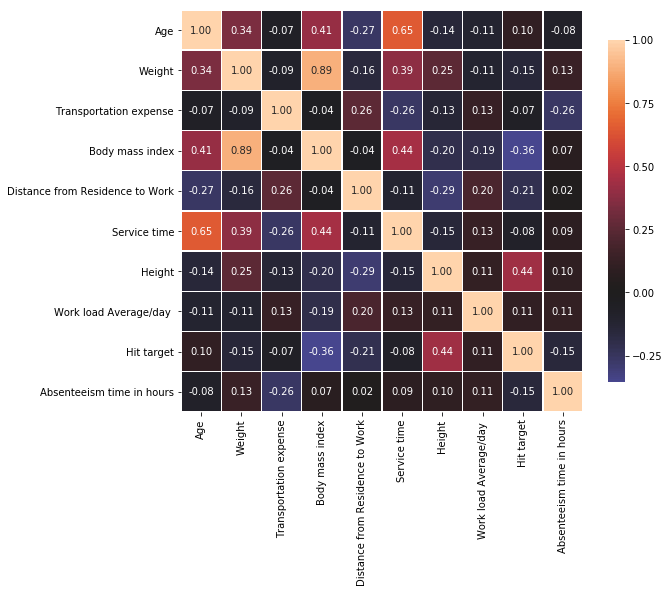

In [10]:
def correlation_heatmap(li):
    correlations = li.corr()

    fig, ax = plt.subplots(figsize=(9,9))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(zz[['Age','Weight','Transportation expense' ,'Body mass index','Distance from Residence to Work','Service time','Height','Work load Average/day ','Hit target','Absenteeism time in hours']])

# PCA 

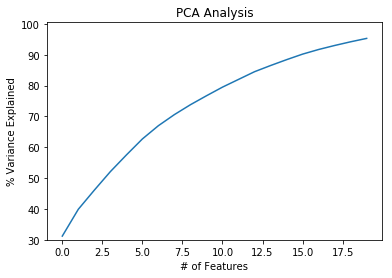

In [14]:
from sklearn.preprocessing import scale
d=StandardScaler().fit_transform(bog)
rt = PCA(n_components=20)
covar_matrix=rt.fit_transform(d)
var=np.cumsum(np.round(rt.explained_variance_ratio_, decimals=3)*100) #cumulative sum of variance explained with [n] features
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')


plt.plot(var)

It looks like we would need 20 principal components out of 62 columns to explain 95% of the explained variance.

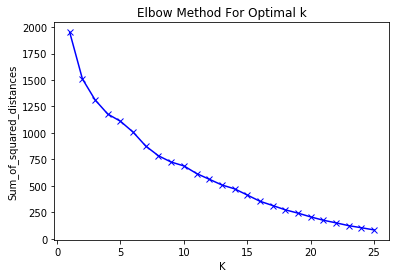

In [15]:
#PCA
pca_reducer=PCA(n_components=20)
reduced_data=pca_reducer.fit_transform(d)
Sum_of_squared_distances = []
K = range(1,26)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(reduced_data)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('K')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

From this above result, we would need to use between 15 to 20 clusters. Since we only have 33 customer IDs, we can see how the clustering method will not be able to find distinct groups employees. 

* For the rest of the project,we will assume there are 740 unique ID's instead of 33. 

/Users/marlynehakizimana/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


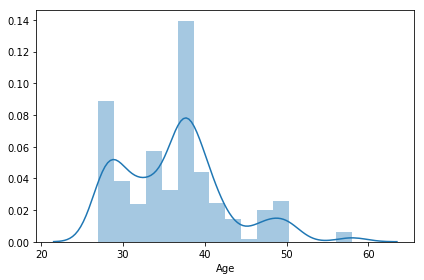

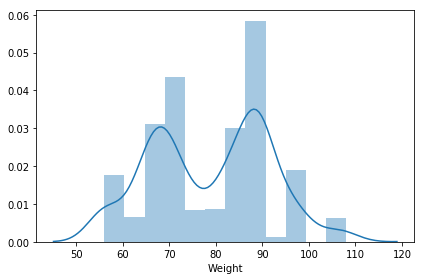

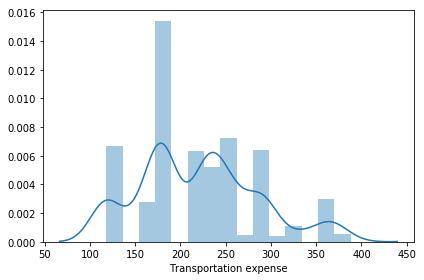

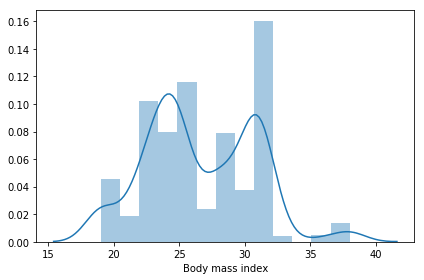

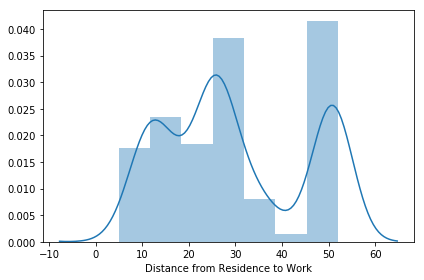

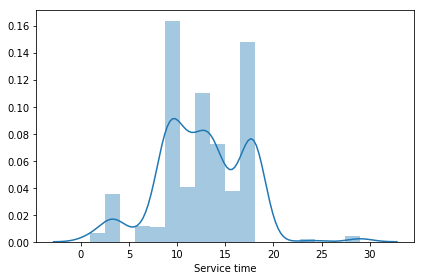

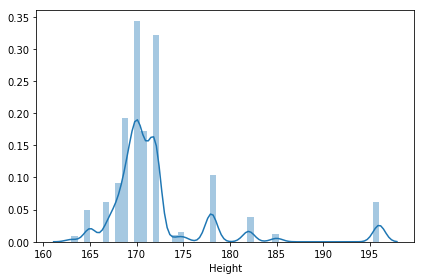

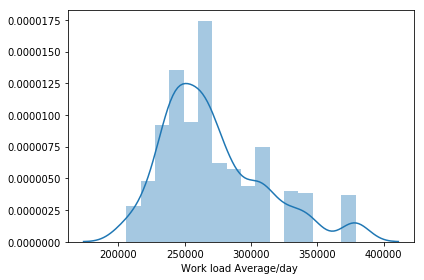

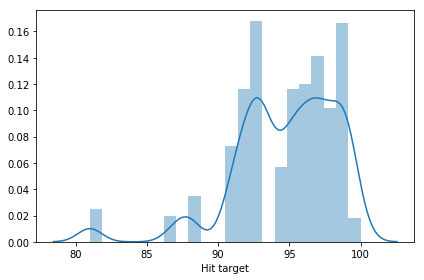

In [19]:
#col=['Age','Service time','Absenteeism time in hours','Work load Average/day ','Hit target','Weight']
col=['Age','Weight','Transportation expense' ,'Body mass index','Distance from Residence to Work','Service time','Height','Work load Average/day ','Hit target']
for i in col:
    sns.distplot(allabsents[i])
    plt.tight_layout()
    plt.show()

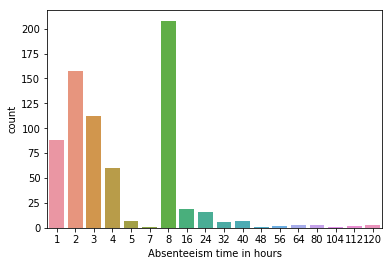

In [20]:
sns.countplot(x='Absenteeism time in hours',data=allabsents)

After that, a statistical focus looks at the dynamics of employees according to Age, Service time and Absenteeism time in hours
​
* Most workers are in between their late 20's and early 40's. On top of that, most employees have between 10 to 18 years of service time.
​
It is worth noticing a few characteristics of the Absenteeism time in hours column: 

    * The plot is more skewed to the right where most values are less than 80 hrs of absence. In fact, **61% of employees have been absent for less than 8hrs** and **29% of them absent for exactly 8hrs**. Hence **91% of Absenteeism time in hours is explained by ony 8 or less hours of absenteeism**.
    * Because of its specific values that are clearly not continuous, we deduce that these are categorical values meaning that we will be using classification for modelling 

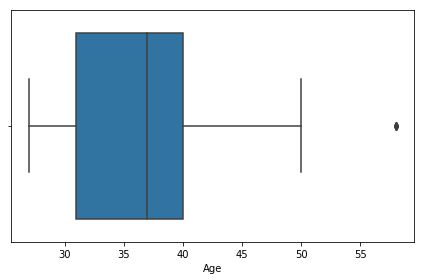

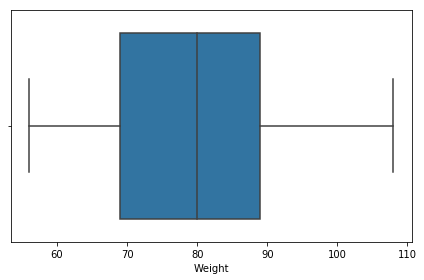

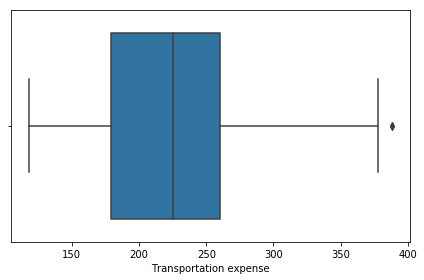

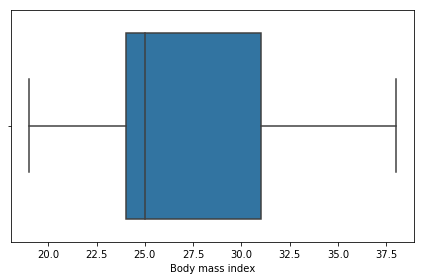

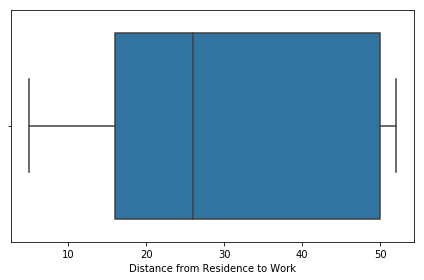

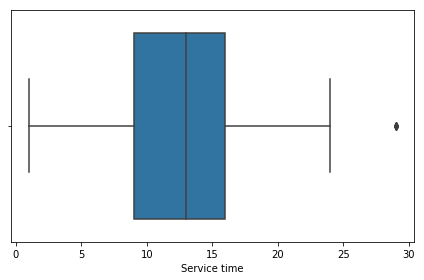

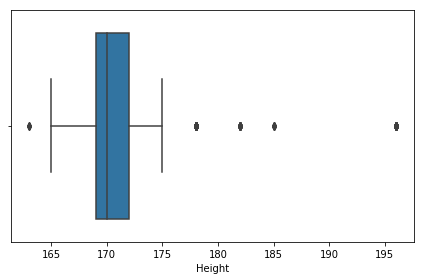

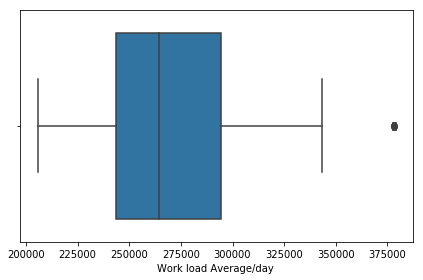

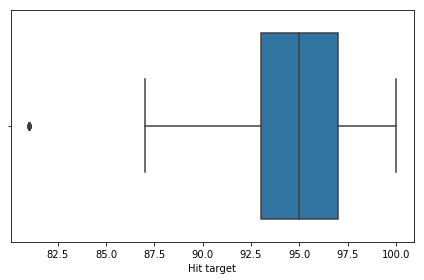

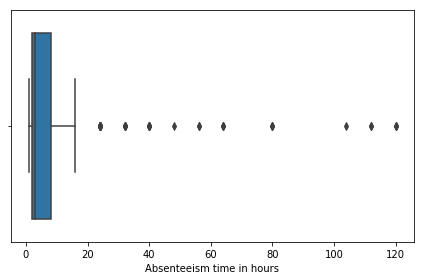

In [17]:
for i in col:
    sns.boxplot(allabsents[i])
    plt.tight_layout()
    plt.show()

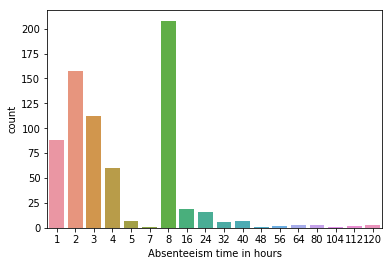

In [18]:
sns.countplot(x='Absenteeism time in hours',data=allabsents)

#  Classification

In [39]:
allabsents=allabsents[allabsents['Absenteeism time in hours']<20]
allabsents=allabsents[allabsents['Absenteeism time in hours']!=7]
allabsents=allabsents[allabsents['Height']<177]
allabsents=allabsents[allabsents['Age']<52]
allabsents=allabsents[allabsents['Work load Average/day ']<375000]
allabsents=allabsents[allabsents['Hit target']>82.5]

In [51]:
de=pd.get_dummies(allabsents['Reason for absence'],prefix='Reason')
da=pd.get_dummies(allabsents['Month of absence'],prefix='Month')
pp=pd.get_dummies(allabsents['Social drinker'],prefix='soc')
pj=pd.get_dummies(allabsents['Social smoker'],prefix='smo')
pa=pd.get_dummies(allabsents['Day of the week'],prefix='day')
px=pd.get_dummies(allabsents['Seasons'],prefix='smo')
rr=pd.get_dummies(allabsents['Education'],prefix='edu')
hj=pd.get_dummies(allabsents['Pet'],prefix='pet')
kl=pd.get_dummies(allabsents['Son'],prefix='Son')

fe=allabsents[['Age','Weight','Transportation expense' ,'Body mass index','Distance from Residence to Work','Service time','Height','Work load Average/day ','Hit target']]

fe[['Age','Weight','Transportation expense' ,'Body mass index','Distance from Residence to Work','Service time','Height','Work load Average/day ','Hit target']]=StandardScaler().fit_transform(fe[['Age','Weight','Transportation expense' ,'Body mass index','Distance from Residence to Work','Service time','Height','Work load Average/day ','Hit target']])
xe=pd.concat([fe,de,px,da,pp,pj,pa,rr,hj,kl],axis=1)

/Users/marlynehakizimana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/Users/marlynehakizimana/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [52]:
aba=[]
for i in allabsents['Absenteeism time in hours']:
    if i<8:
        aba.append(0)
    else:
        aba.append(1)
allabsents['newabsent']=aba


In [53]:
bo=[]
for i in allabsents['Reason for absence']:
    if i<20:
        bo.append('ICD')
    else:
        bo.append('Non ICD')
allabsents['newReason']=bo

/Users/marlynehakizimana/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


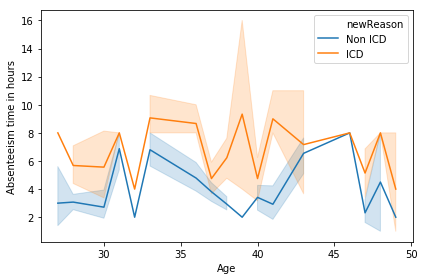

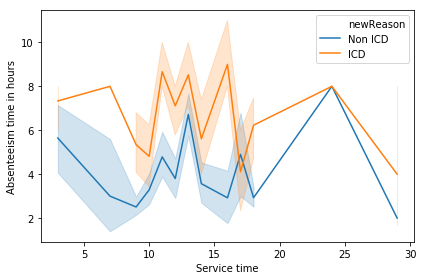

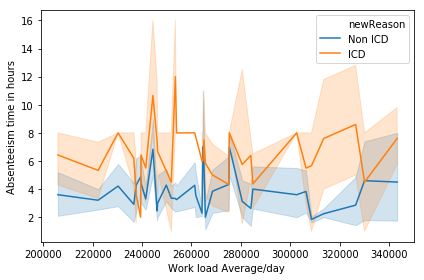

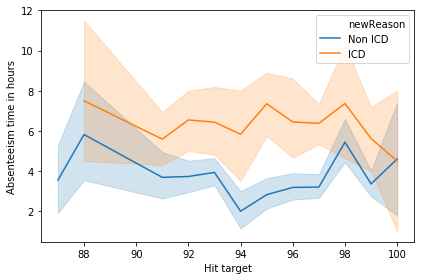

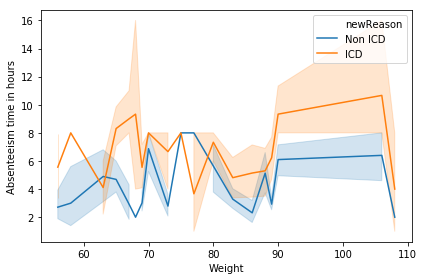

In [54]:
col=['Age','Service time','Work load Average/day ','Hit target','Weight']
for i in col:
    sns.lineplot(x=i,y='Absenteeism time in hours',hue='newReason',data=allabsents)
    plt.tight_layout()
    plt.show()

In [55]:
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics 
from sklearn.metrics import confusion_matrix,recall_score, precision_score,f1_score,roc_auc_score, roc_curve,accuracy_score,mean_squared_error,classification_report,r2_score

In [56]:
XX=xe
YY=allabsents['newabsent']
XX_train, XX_test, YY_train, YY_test = train_test_split(XX, YY, test_size=0.3,random_state=324)
print (XX_train.shape, YY_train.shape)
print (XX_test.shape, YY_test.shape)

(368, 73) (368,)
(158, 73) (158,)


In [57]:
#Putting all models together 
def modeleval(xtrain,ytrain,x,y):
    #RandomForest
    ra=RandomForestClassifier(n_jobs=-1,n_estimators=300,random_state=42)
    random=ra.fit(xtrain, ytrain)
    Y_random=random.predict(x)
    y_hat = random.predict_proba(x)[::,1]
    fpr, tpr,_ = roc_curve(y,  y_hat)
    auc = roc_auc_score(y, y_hat)
    #RMSE random
    RMSE_random=sqrt(mean_squared_error(y_true=y,y_pred=Y_random))
    #LogisticRegression
    logi=LogisticRegression(random_state=0,solver='lbfgs',multi_class='multinomial').fit(xtrain, ytrain)
    Y_logi=logi.predict(x)
    y_hat1 = logi.predict_proba(x)[::,1]
    fpr, tpr,_ = roc_curve(y,  y_hat1)
    auc1 = roc_auc_score(y, y_hat1)
    #Logi RMSE
    RMSE_logi=sqrt(mean_squared_error(y_true=y,y_pred=Y_logi))
    all={'R_Squared':[random.score(x,y),logi.score(x,y)],'AUC':[auc,auc1]}
    dg=pd.DataFrame(data=all)
    di=dg.rename({0:'RandomForest',1:'Logistic Regression'},axis='index')
    print(di)
    print(di.plot(kind="bar",figsize=(10,10)))

                     R_Squared       AUC
RandomForest          0.816456  0.867328
Logistic Regression   0.816456  0.853793
AxesSubplot(0.125,0.125;0.775x0.755)


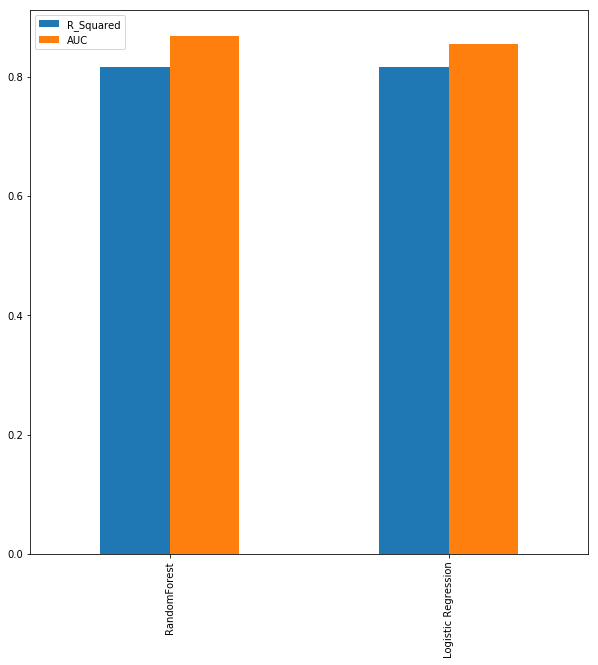

In [58]:
modeleval(XX_train,YY_train,XX_test,YY_test)

In [59]:
random=RandomForestClassifier(n_estimators=300,random_state=42,n_jobs=-1)
fity=random.fit(XX_train, YY_train)
Y_random=random.predict(XX_test)
y_hat = random.predict_proba(XX_test)[::,1]
colu=pd.DataFrame(random.feature_importances_,
                                   index = xe.columns,columns=['importance']).sort_values('importance', ascending=False)

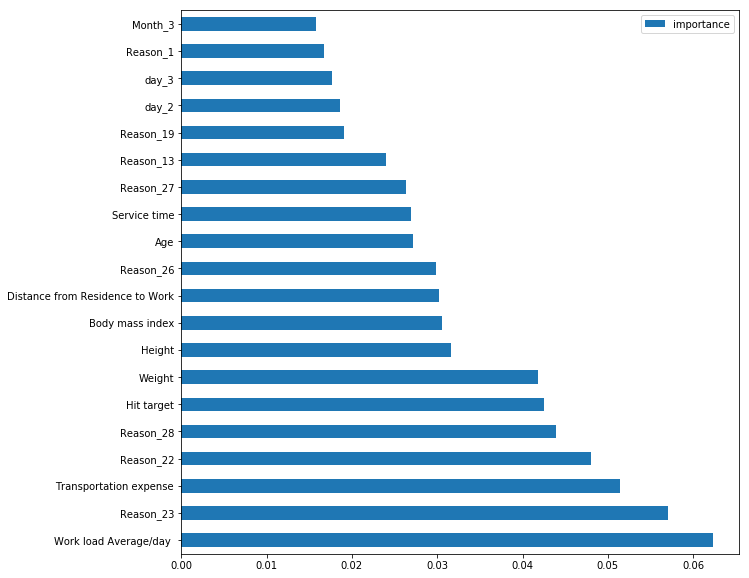

In [60]:
col=colu[colu['importance']>=0.015]
col.plot(kind="barh",figsize=(10,10));

In [61]:
fp=col.index
XX=xe[fp]
YY=allabsents['newabsent']

XX_train, XX_test, YY_train, YY_test = train_test_split(XX, YY, test_size=0.3,random_state=42)

random=RandomForestClassifier(n_estimators=300,random_state=42,n_jobs=-1)
fity=random.fit(XX_train, YY_train)
Y_random=random.predict(XX_test)
y_hat = random.predict_proba(XX_test)[::,1]
auc = roc_auc_score(YY_test, y_hat)
print('R^2:',random.score(XX_test,YY_test))
print('AUC score:',auc)

R^2: 0.8291139240506329
AUC score: 0.9006712626995647


Even after doing an optimization of features, we get similar values.